# First equation

Simulation of the following equation: <br> $\frac{dx_i(t)}{dt} = p_i \cdot s_i \cdot A_i(t) \cdot \frac{E_i(t)^n}{E_i(t)^n + E_{0i}^n} \cdot \frac{S_{0i}^m}{S_i(t)^m + S_{0i}^m} - q_i \cdot x_i(t)$

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import seaborn as sns

## Some toy tries with simple parameters

Defying equation:

In [ ]:
def gene_expression(t, x, p, s, q, n, m, A, E, S, E_trh, S_trh):

    enhancer_term = np.power(E, n) / (np.power(E, n) + np.power(E_trh, n))
    silencer_term = np.power(S_trh, m) / (np.power(S, m) + np.power(E_trh, m))

    dx_dt = p * s * A * enhancer_term * silencer_term - q * x

    return dx_dt

Now we have to set initial parameters. We can first assume just 3 genes and several situations: <br>
1. all initial expr are the same as well as transcription terms, Enhancer activity is from 1 to 0.2, Silencer activity the same low
2. all initial expr are the same as well as transcription terms, Enhancer activity is low, Silencer activity from 1 to 0.2
3. all initial expr are the same as well as transcription terms, Enhancer activity from 1 to 0.2, Silencer activity from 1 to 0.2
4. all initial expr are the same as well as transcription terms, Enhancer activity from 0.2 to 1, Silencer activity from 1 to 0.2

In [ ]:
# initial gene expr
x0 = [1.0, 0.5, 0.2]

# transcription parameters
p = np.array([1.0, 0.8, 0.6])  # transcr amplification
s = np.array([1.0, 0.9, 0.7])  # tarnscr rate
q = np.array([0.1, 0.1, 0.1])  # degradation rates

# promotor active state - can be yeild from diff equations as in paper but here we'll assume const
A = [1, 1, 1]

# enhancer and silencer thresholds
E_trh = 0.1
S_trh = 0.5
# params controling steepness
n = 2
m = 2
# initial values
E = np.array([0.8, 0.2, 0.5])
S = np.array([0.2, 0.5, 0.8])

Time span for simulation:

In [ ]:
t_span = (0,100)

Solving the equation numerically:

In [ ]:
solution  = solve_ivp(
    gene_expression,
    t_span = t_span,
    y0 = x0,
    args = (p, s, q, n, m, A, E, S, E_trh, S_trh),
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
)

Plotting the results:

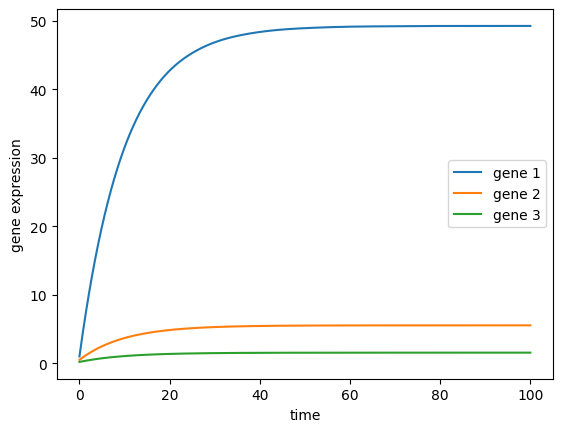

In [ ]:
t = solution.t
gene_expression_levels = solution.y

plt.figure()
for i in range(len(x0)):
    plt.plot(t, gene_expression_levels[i], label=f"gene {i+1}")
plt.xlabel("time")
plt.ylabel("gene expression")
plt.legend()
plt.show()

In [ ]:
# all in one function

def solve_plot(x0, p, s, q, n, m, A, E, S, E_trh, S_trh, xq,
              t_span = (0, 100), ylim=(0,150)):
    solution  = solve_ivp(
    gene_expression,
    t_span = t_span,
    y0 = x0,
    args = (p, s, q, n, m, A, E, S, E_trh, S_trh, xq),
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    )

    t = solution.t
    gene_expression_levels = solution.y

    plt.figure()
    for i in range(len(x0)):
        plt.plot(t, gene_expression_levels[i], label=f"gene {i+1}")
    plt.xlabel("time")
    plt.ylabel("gene expression")
    plt.ylim(ylim)
    plt.legend()
    plt.show()

## Exploring different cases

common values:

In [ ]:
# initial gene expr
x0 = [1.0, 1.0, 1.0]

# transcription parameters
p = np.array([10, 10, 10])  # transcr amplification - picked randomly
s = np.array([0.17, 0.17, 0.17])  # tarnscr rate - mean for mouse from the paper
q = np.array([2**(-2.24), 2**(-2.24), 2**(-2.24)])  # degradation rates - mean for mouse from the paper

# promotor active state - can be yeild from diff equations as in paper but here we'll assume const
A = [1, 1, 1]

# enhancer and silencer thresholds
E_trh = 0.5
S_trh = 0.5
# params controling steepness
n = 2
m = 2

### Case 1:

all initial expr are the same as well as transcription terms, Enhancer activity is from 1 to 0.2, Silencer activity the same low

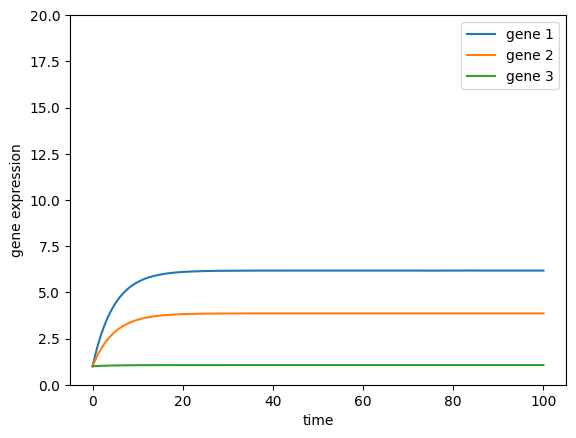

In [ ]:
# initial values
E = np.array([1.0, 0.5, 0.2])
S = np.array([0.1, 0.1, 0.1])

solve_plot(x0, p, s, q, n, m, A, E, S, E_trh, S_trh, ylim=(0,20))

### Case 2

all initial expr are the same as well as transcription terms, Enhancer activity is low, Silencer activity from 1 to 0.2

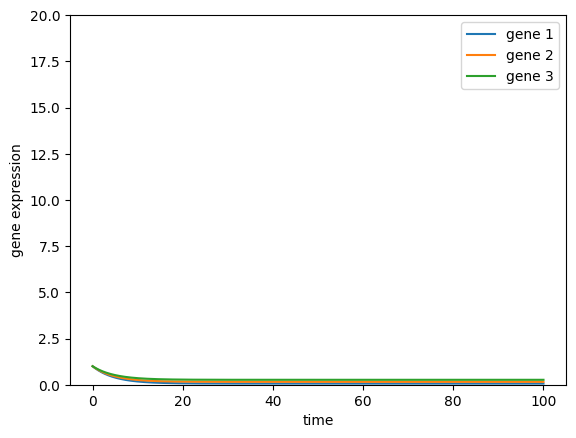

In [ ]:
# initial values
E = np.array([0.1, 0.1, 0.1])
S = np.array([1.0, 0.5, 0.2])

solve_plot(x0, p, s, q, n, m, A, E, S, E_trh, S_trh, ylim=(0,20))

### Case 3

all initial expr are the same as well as transcription terms, Enhancer activity from 1 to 0.2, Silencer activity from 1 to 0.2

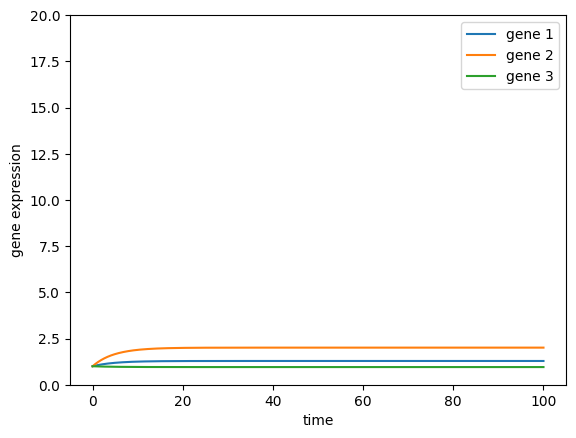

In [ ]:
# initial values
E = np.array([1.0, 0.5, 0.2])
S = np.array([1.0, 0.5, 0.2])

solve_plot(x0, p, s, q, n, m, A, E, S, E_trh, S_trh, ylim=(0,20))

### Case 4

all initial expr are the same as well as transcription terms, Enhancer activity from 0.2 to 1, Silencer activity from 1 to 0.2

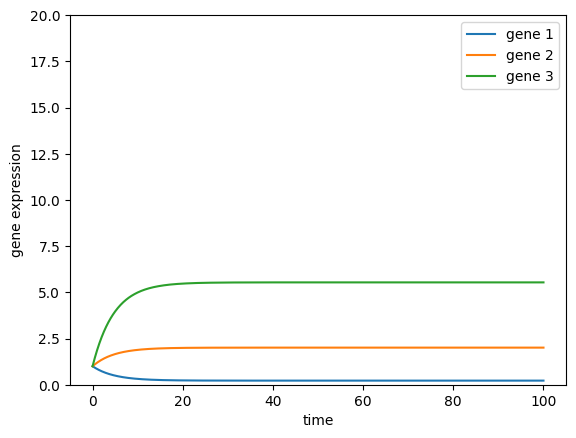

In [ ]:
# initial values
E = np.array([0.2, 0.5, 1.0])
S = np.array([1.0, 0.5, 0.2])

solve_plot(x0, p, s, q, n, m, A, E, S, E_trh, S_trh, ylim=(0,20))

### Case 5

all initial expr are the same as well as transcription terms, Enhancer activity from 1 to 0.2, Silencer activity from 0.2 to 1

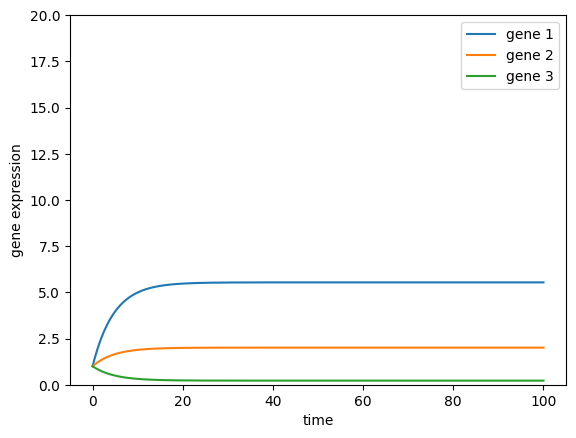

In [ ]:
# initial values
E = np.array([1.0, 0.5, 0.2])
S = np.array([0.2, 0.5, 1.0])

solve_plot(x0, p, s, q, n, m, A, E, S, E_trh, S_trh, ylim=(0,20))

# With parameters from distributions + Second Equatoin

Another equation:

$\frac{dx_i(t)}{dt} = p_i \cdot s_i \cdot A_i(t) \cdot \frac{(E_i(t)/K_e1 + 1)(A_i(t)+K_e2)}{(A_i(t)+K_s2)(1+S_i(t)/K_s1)} - q_ix_i(t)$

here I sampled parameters for each gene from the distribution stated in the initial paper: <br>
* sigma: lognorm with mean (log scale) and standard deviation parameters, μ = −2.24 and σ = 0.61 for mouse and μ = −1.58 and σ = 0.73 for human
* phi: "our result showed no noticeable difference in the patterns between fixed value or Poisson distributed phi", so we'll set it to 10
* x: "lognormal distribution for xiδi, with parameters μ = 0.17 and σ = 2.67 for mouse and μ = 0.73 and σ = 2.53 for human" <br>
so we'll use $\mu = 0.73/2^{-1.58}$ and $\sigma = 2.53/2^{0.73}$ (see below)
* s: Zipf's law distribution with exponent r = 0.8

We'll wrap all in two functions here:

In [ ]:
print(f'mu = {0.73/(2**(-1.58))}')

mu = 2.18247990300701


In [ ]:
print(f'sigma = {2.53/(2**(0.73))}')

sigma = 1.525346902028812


In [ ]:
# all in one function

def gene_expression_eq1(t, x, phi, s, delta, n, m, A, E, S, E_trh, S_trh):

    enhancer_term = np.power(E, n) / (np.power(E, n) + np.power(E_trh, n))
    silencer_term = np.power(S_trh, m) / (np.power(S, m) + np.power(E_trh, m))

    dx_dt = phi * s * A * enhancer_term * silencer_term - x*delta

    return dx_dt

def gene_expression_eq2(t, x, phi, s, delta, A, E, S, Ek1, Ek2, Sk1, Sk2):

    dx_dt = phi * s * A * ((E/Ek1 + 1)*(A + Ek2))/((A + Sk2)*(1+S/Sk1)) - x*delta

    return dx_dt

def solve_eq(eq, x0, params, t_span = (0, 10)):
    # solving the equation numerically
    solution  = solve_ivp(
        eq,
        t_span = t_span,
        y0 = x0,
        args = params,
        t_eval = np.linspace(t_span[0], t_span[1], 1000)
        )
    return solution

def plot(solution, linestyle='solid', ylim=(0,150)):

    # extracting solution points
    t = solution.t
    gene_expression_levels = solution.y

    # since we have many genes we can take an average
    avg = np.mean(gene_expression_levels, axis=0)
    median = np.median(gene_expression_levels, axis=0)

    # plotting x
    plt.figure()
    plt.plot(t, avg, label="mean", linestyle=linestyle)
    plt.plot(t, median, label="median", linestyle=linestyle)
    plt.xlabel("time")
    plt.ylabel("gene expression")
    plt.ylim(ylim)
    plt.legend()
    plt.show()

General:

In [ ]:
n_genes = 20000

# TRANSCRIPTION PARAMETERS FROM THE ARTICLE

delta = np.random.lognormal(mean=2**(-2.24), sigma=2**(0.61), size=n_genes) # degradation rates * initial val- mean for mouse from the paper
s = np.random.zipf(a=1+0.8, size=n_genes)  # tarnscr rate - mean for mouse from the paper
phi = np.array([10]*n_genes)   # transcr amplification - mean for mouse from the paper
x0 = np.random.lognormal(mean=0.73/(2**(-1.58)), sigma=2.53/(2**(0.73)), size=n_genes)

# promotor active state - can be found from diff equations as in paper
# but here we'll assume const, that promotor is always on
A = np.array([1]*n_genes)

# case with enhancer ON, silencer OFF
E = np.array([1]*n_genes)
S = np.array([0.01]*n_genes)

For the first equation:

In [ ]:
# PARAMETERS FOR ENHANCER AND SILENCER ARE CHOSEN RANDOMLY

# enhancer and silencer thresholds
E_trh = 0.1
S_trh = 0.5
# params controling steepness
n = 2
m = 2

For the second equation:

In [ ]:
Ek1, Ek2 = 1, 10**6 # k1 less, k2 more
Sk1, Sk2 = 1, 1

Solving the equations:

In [ ]:
params1 = [phi, s, delta, n, m, A, E, S, E_trh, S_trh]
res1 = solve_eq(gene_expression_eq1, x0, params1)

In [ ]:
params2 = [phi, s, delta, A, E, S, Ek1, Ek2, Sk1, Sk2]
res2 = solve_eq(gene_expression_eq2, x0, params2)

In [ ]:
res1

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-02 ...  9.990e+00  1.000e+01]
        y: [[ 3.366e+01  3.785e+01 ...  2.466e+02  2.466e+02]
            [ 6.596e-01  5.478e+00 ...  1.722e+02  1.722e+02]
            ...
            [ 2.141e+01  2.383e+01 ...  1.407e+03  1.408e+03]
            [ 1.772e+01  1.536e+02 ...  7.746e+03  7.746e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 17348
     njev: 0
      nlu: 0

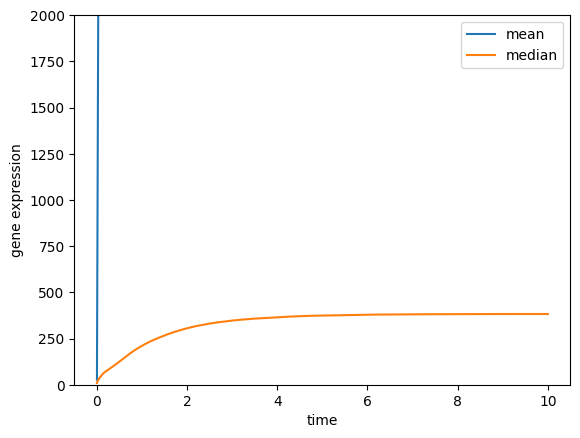

In [ ]:
plot(res1, ylim = (0, 2000))

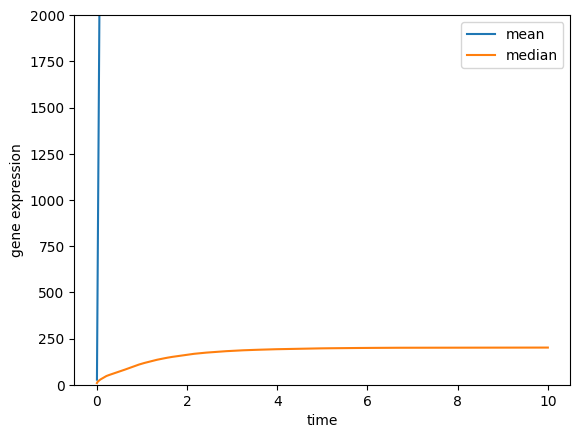

In [ ]:
plot(res2, ylim = (0, 2000))

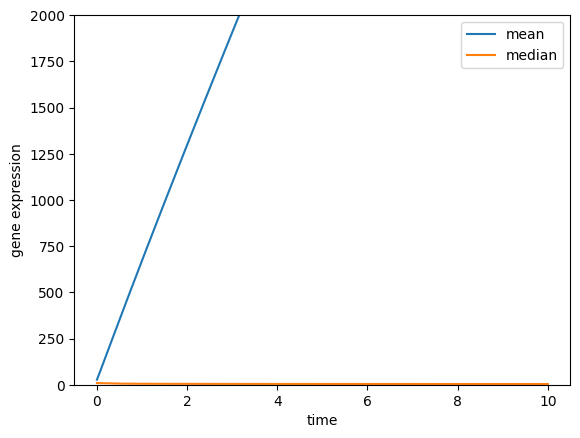

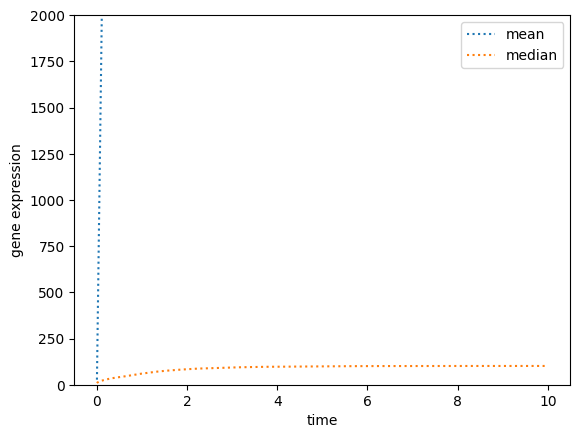

In [ ]:
# case with enhancer OFF and silencer OFF

E = np.array([0.01]*n_genes)
S = np.array([0.01]*n_genes)

params1 = [phi, s, delta, n, m, A, E, S, E_trh, S_trh]
params2 = [phi, s, delta, A, E, S, Ek1, Ek2, Sk1, Sk2]

res1 = solve_eq(gene_expression_eq1, x0, params1)
res2 = solve_eq(gene_expression_eq2, x0, params2)
plot(res1, ylim = (0, 2000))
plot(res2, ylim = (0, 2000), linestyle = 'dotted')

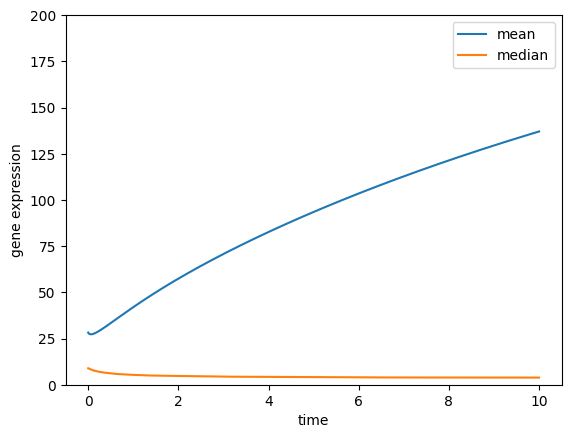

In [ ]:
plot(res, ylim = (0, 200))

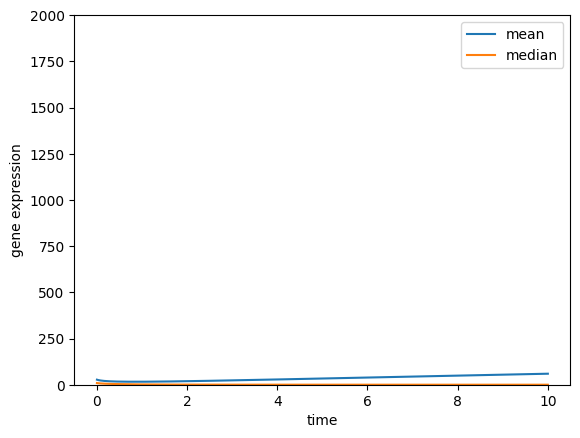

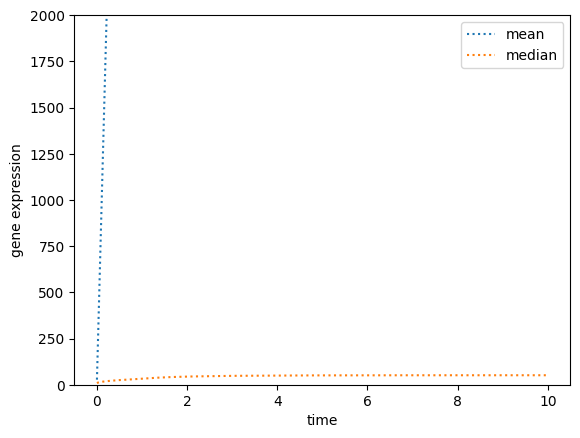

In [ ]:
# case with enhancer OFF and silencer ON

# case with enhancer on
E = np.array([0.01]*n_genes)
S = np.array([1]*n_genes)

params1 = [phi, s, delta, n, m, A, E, S, E_trh, S_trh]
params2 = [phi, s, delta, A, E, S, Ek1, Ek2, Sk1, Sk2]

res1 = solve_eq(gene_expression_eq1, x0, params1)
res2 = solve_eq(gene_expression_eq2, x0, params2)
plot(res1, ylim = (0, 2000))
plot(res2, ylim = (0, 2000), linestyle = 'dotted')

### Adding noise

In [ ]:
n_genes = 20000

# PARAMETERS FOR ENHANCER AND SILENCER ARE CHOSEN RANDOMLY

# enhancer and silencer thresholds
E_trh = 2
S_trh = 3
# params controling steepness
n = 2
m = 2

# case with enhancer ON, silencer OFF
E = np.array([5]*n_genes)
S = np.array([2]*n_genes)

# TRANSCRIPTION PARAMETERS FROM THE ARTICLE

delta = np.random.lognormal(mean=2**(-2.24), sigma=0.61, size=n_genes) # degradation rates * initial val- mean for mouse from the paper
s = np.array([100]*n_genes)
phi = np.array([100]*n_genes)   # transcr amplification - mean for mouse from the paper
x0 = np.random.zipf(a=1+0.8, size=n_genes)  # tarnscr rate - mean for mouse from the paper
#np.random.lognormal(mean=0.73/(2**(-1.58)), sigma=2.53/0.73, size=n_genes)

# promotor active state - can be found from diff equations as in paper
# but here we'll assume const, that promotor is always on
A = np.array([1]*n_genes)

res = solve_eq(x0, phi, s, delta, n, m, A, E, S, E_trh, S_trh)

In [ ]:
res1.y.shape

(20000, 1000)

In [ ]:
# for mouse add=0.06, mult=0.1
def add_noise(xval, lvl_add_noise=0.08, lvl_mult_noise=0.1):
  additive_noise = np.random.lognormal(mean=0, sigma=lvl_add_noise*xval)
  multiplicative_noise = np.random.lognormal(mean=0, sigma=lvl_mult_noise)
  log_x = multiplicative_noise*(xval + additive_noise)

  #log_x = np.apply_along_axis(lambda row: multiplicative_noise*(row + additive_noise), 1, raw_vals)

  return log_x

This is quite slow but it's working:

In [ ]:
# extracting solution points
t = res1.t
gene_expression_levels = res1.y

# adding the noise
gene_expression_levels_noised = np.vectorize(add_noise)(gene_expression_levels)

# since we have many genes we can take an average
avg = np.mean(gene_expression_levels_noised, axis=0)
median = np.median(gene_expression_levels_noised, axis=0)


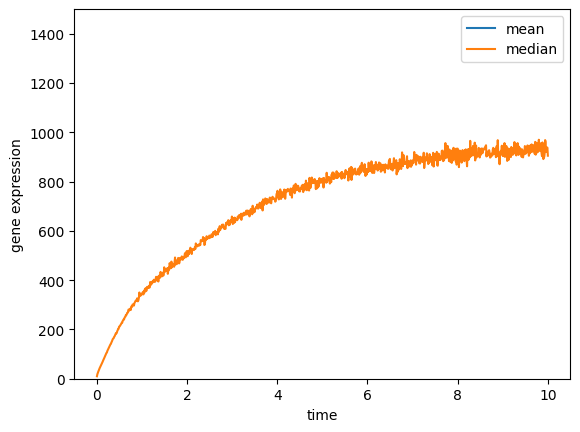

In [ ]:
ylim=(0,1500)

plt.figure()
plt.plot(t, avg, label="mean")
plt.plot(t, median, label="median")
plt.xlabel("time")
plt.ylabel("gene expression")
plt.ylim(ylim)
plt.legend()
plt.show()

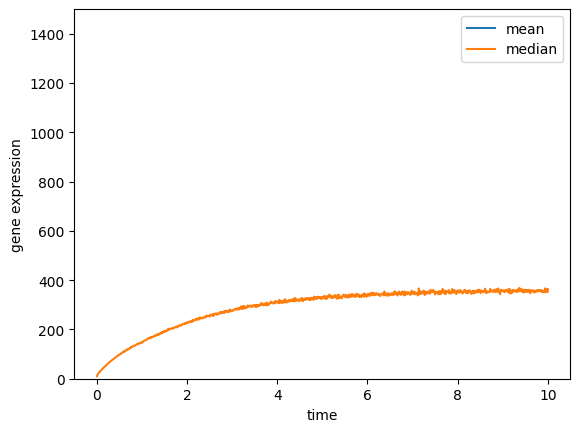

In [ ]:
ylim=(0,1500)

plt.figure()
plt.plot(t, avg, label="mean")
plt.plot(t, median, label="median")
plt.xlabel("time")
plt.ylabel("gene expression")
plt.ylim(ylim)
plt.legend()
plt.show()